## Spaceship-titanic

In [1]:
# competition link: https://www.kaggle.com/competitions/spaceship-titanic

In [129]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement missingno (from versions: none)
ERROR: No matching distribution found for missingno


## Importing Major Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


## Importing datasets

In [11]:
train_df = pd.read_csv(r'C:\Users\push2\Desktop\DSE cc intern\Record\Module 11\train (3).csv')
test_df = pd.read_csv(r'C:\Users\push2\Desktop\DSE cc intern\Record\Module 11\test (3).csv')

In [230]:
pass_df = pd.read_csv(r'C:\Users\push2\Desktop\DSE cc intern\Record\Module 11\test (3).csv')

In [13]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [15]:
train_df.shape

(8693, 14)

In [16]:
test_df.shape

(4277, 13)

## Data - Description

> * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>
> * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.<br>
> * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>
> * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
> * **Destination** - The planet the passenger will be debarking to.<br>
> * **Age** - The age of the passenger.<br>
> * **VIP** - Whether the passenger has paid for special VIP service during the voyage.<br>
> * **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
> * **Name** - The first and last names of the passenger.<br>
> * **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>

## Checking for Duplicates

In [20]:
train_df.duplicated().sum()

0

In [21]:
test_df.duplicated().sum()

0

## Checking te data-types

In [23]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [25]:
test_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

## Checking total number & percentage missing values in train_df

In [30]:
train_df.isnull().sum()/len(train_df)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

## Checking total number & percentage missing values in test_df

In [31]:
test_df.isnull().sum()/len(test_df)

PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64

## Checking Cardinality of Categorical features

In [33]:
train_df.select_dtypes(include = 'object').nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [34]:
test_df.select_dtypes(include = 'object').nunique()

PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64

## EDA

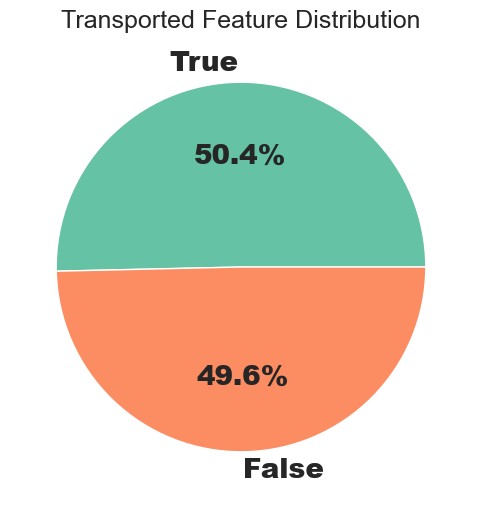

In [36]:
plt.figure(figsize=(10,6))
plt.pie(train_df["Transported"].value_counts(),labels=train_df["Transported"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Transported Feature Distribution");

### Visulaizing AGE feature

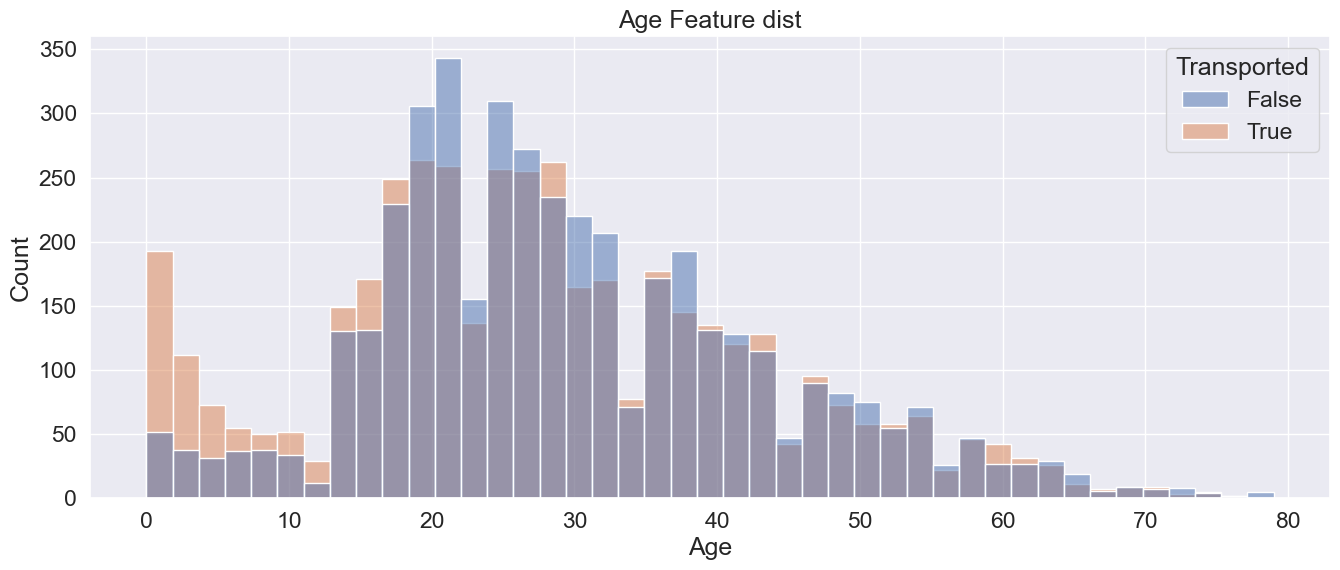

In [39]:
plt.figure(figsize = (16, 6))
sns.histplot(x = train_df['Age'], hue = "Transported", data = train_df)
plt.title('Age Feature dist')
plt.show()

### Visualizing all Expenditure Features

In [40]:
exp_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


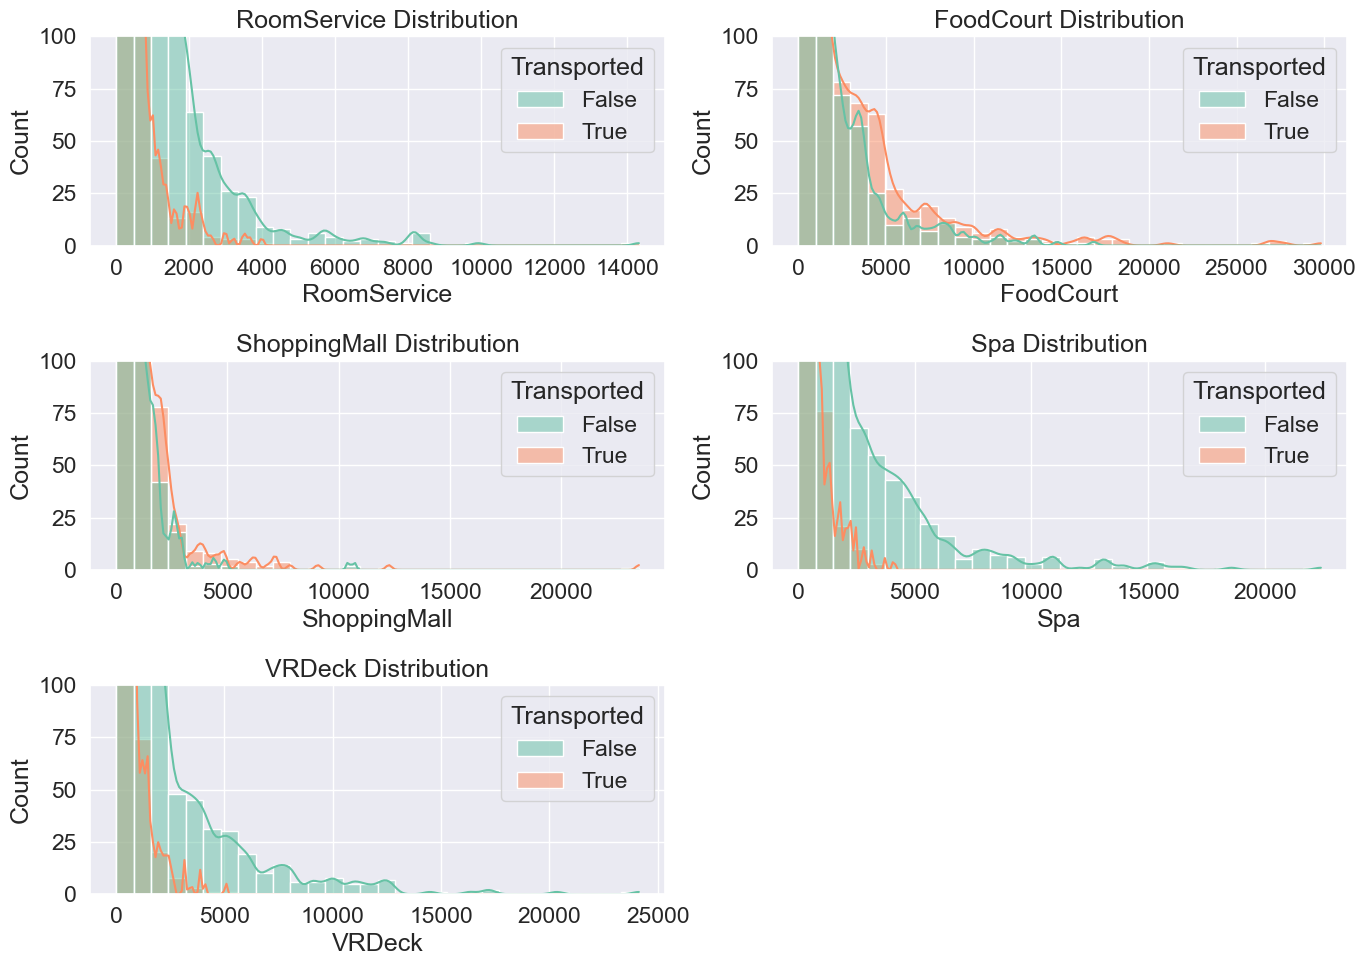

In [43]:
plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

## Visualizing Categorical Features

In [44]:
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

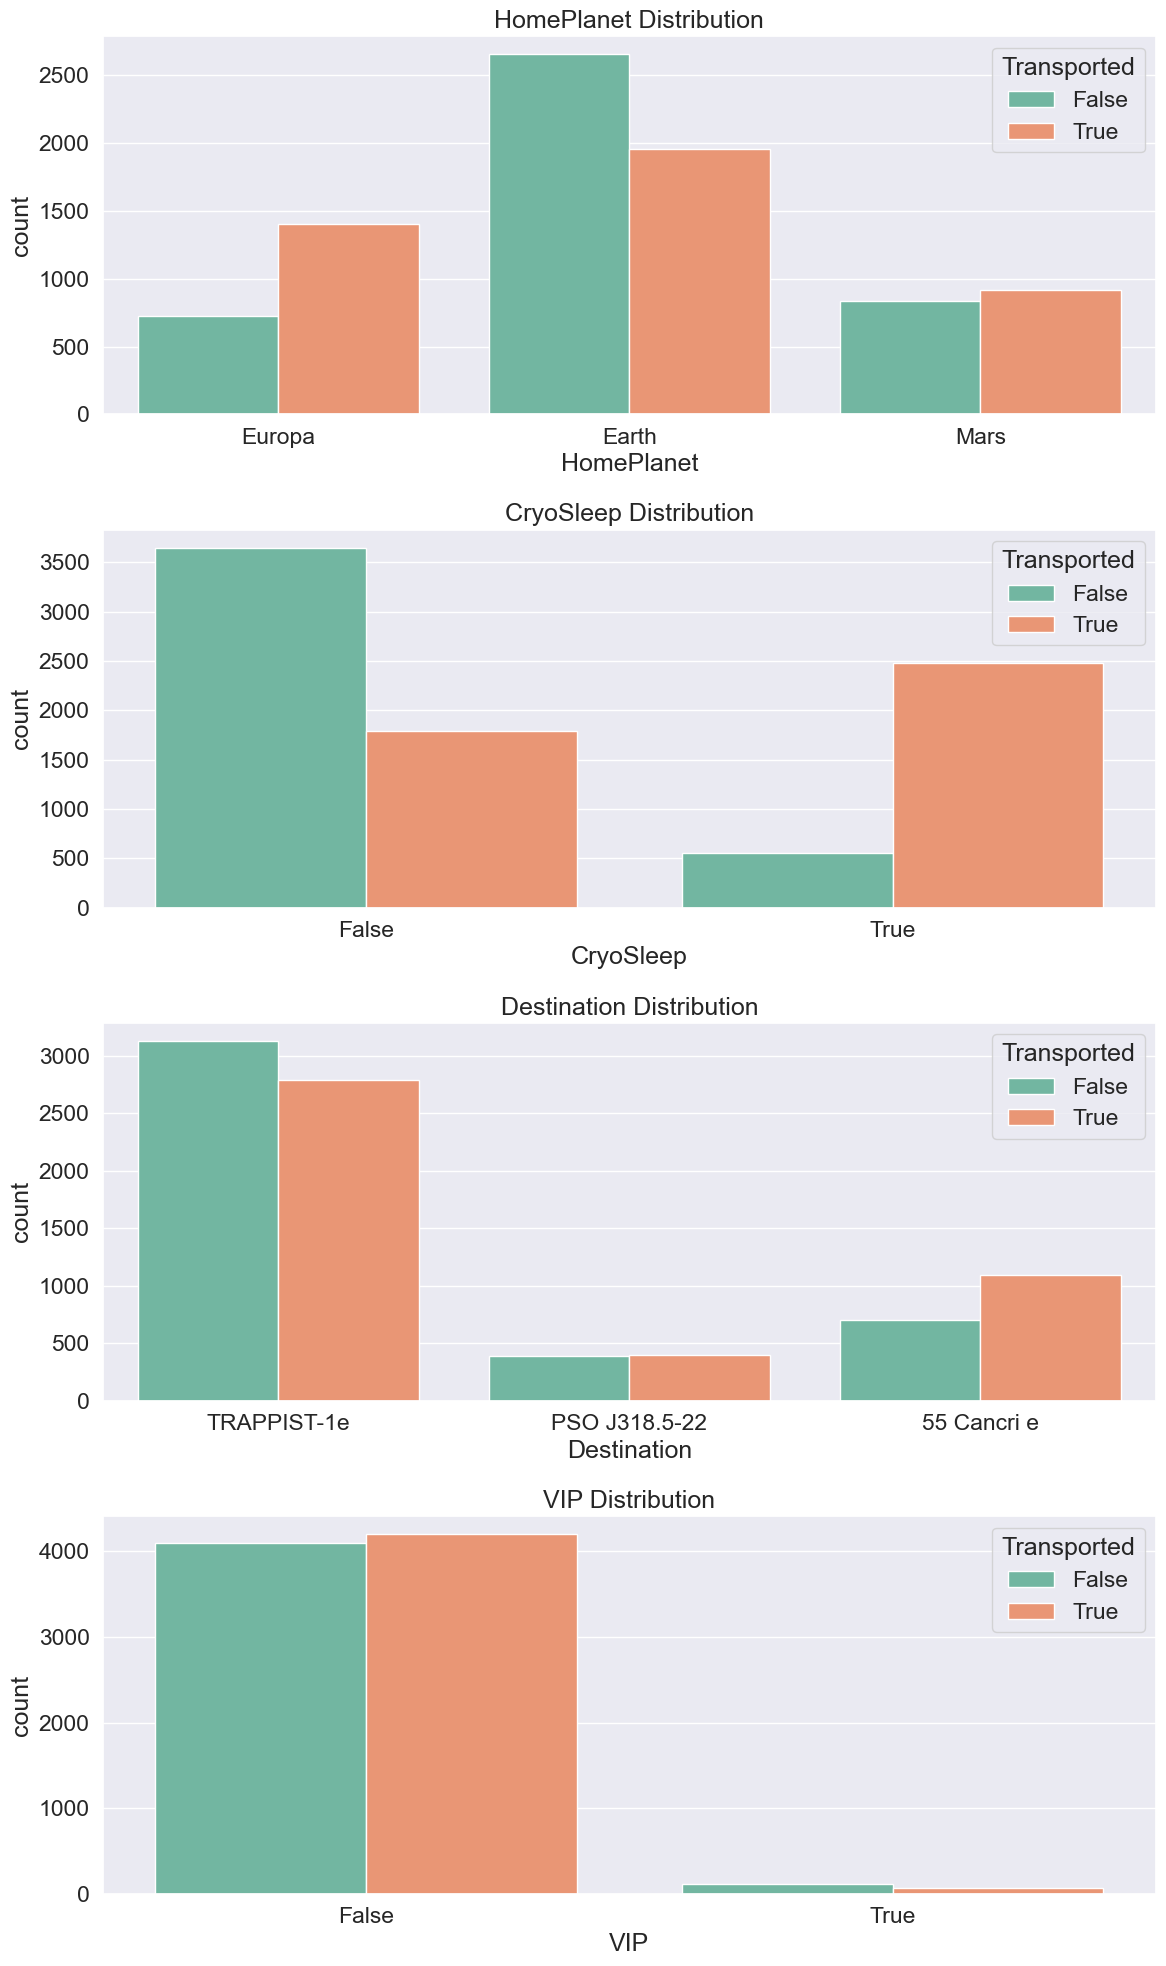

In [45]:
plt.figure(figsize=(12,20))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

## Feature Engineering

In [48]:
train_df['PassengerId'].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


In [49]:
def passengerid_new_features(df):

    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    x = df.groupby("Group")["Member"].count().sort_values()
    y = set(x[x>1].index)
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [50]:
passengerid_new_features(train_df)

In [52]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1


In [53]:
passengerid_new_features(test_df)

In [55]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Member,Travelling_Solo,Group_Size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,True,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,True,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,True,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,True,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,True,1


In [56]:
train_df.drop(columns = ['Group', 'Member'], inplace = True)
test_df.drop(columns = ['Group', 'Member'], inplace = True)

In [59]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_Solo,Group_Size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1


## Visualizing 'Group_size' and 'Travelling Solo' features

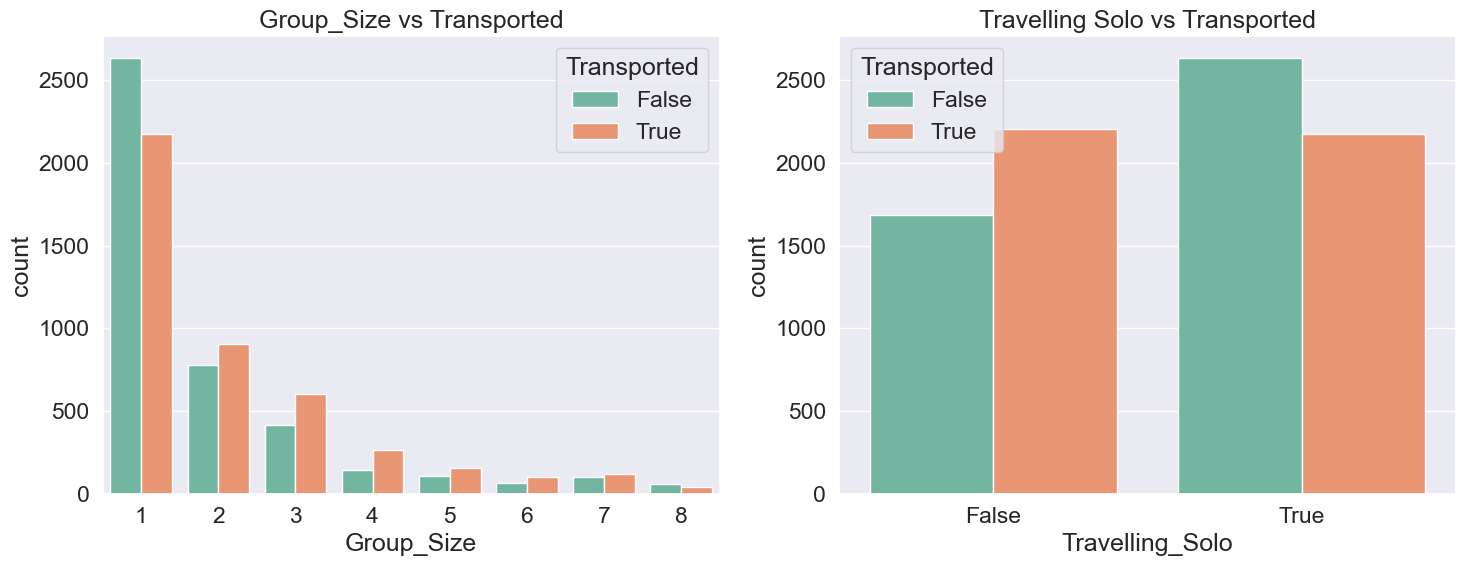

In [60]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df,palette="Set2")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df,palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

## Creating New feature using Cabin Feature

In [62]:
train_df['Cabin'].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [63]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
   
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
   
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

In [65]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

In [67]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,1,S


In [68]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1,F,5,S


## Visualizing the cabion deck and cabin side features

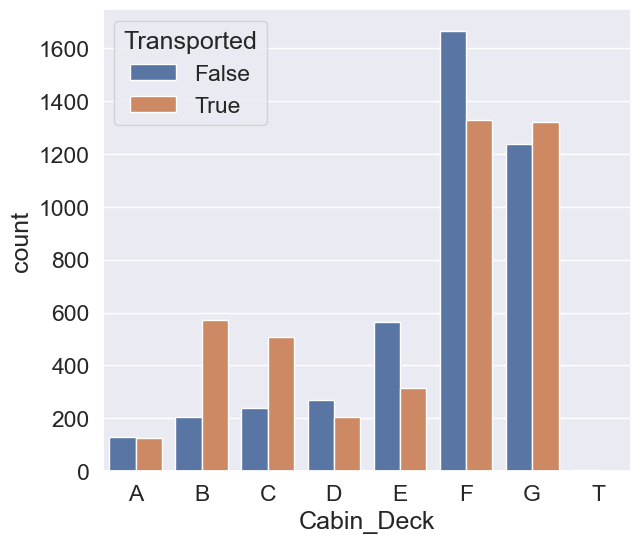

In [72]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Cabin_Deck', hue = 'Transported', data = train_df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.show()

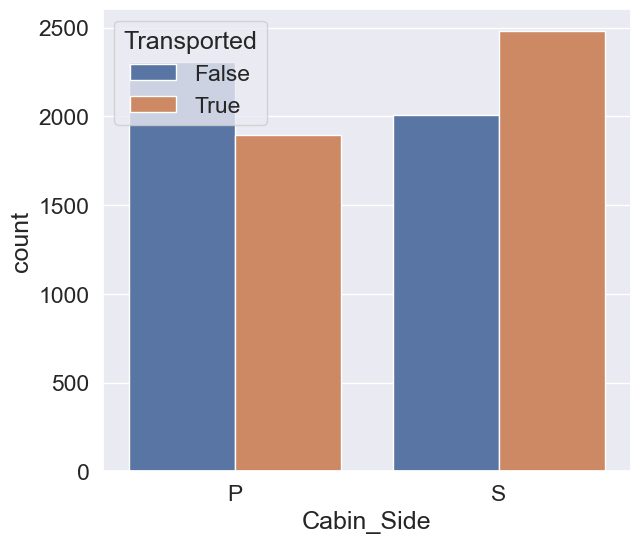

In [73]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Cabin_Side', hue = 'Transported', data = train_df)
plt.show()

## Visualizing "Cabin_Number" Feature

In [75]:
train_df['Cabin_Number'] = train_df['Cabin_Number'].astype(int)
test_df['Cabin_Number'] = test_df['Cabin_Number'].astype(int)

In [77]:
train_df['Cabin_Number'].nunique()

1817

In [78]:
train_df['Cabin_Number'].mean()

596.3989416772115

In [79]:
train_df['Cabin_Number'].median()

427.0

In [80]:
train_df['Cabin_Number'].min()

0

In [81]:
train_df['Cabin_Number'].max()

1894

### Visualizing

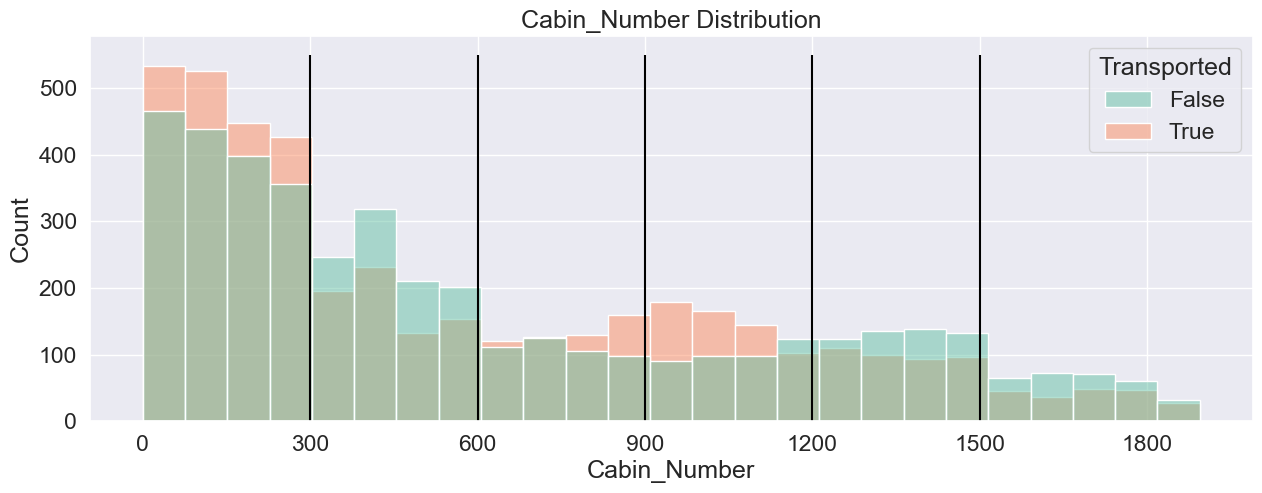

In [83]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

## Creating New Feature 'Cabin_Regions' From 'Cabin_Number'

In [85]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [88]:
cabin_regions(train_df)


In [87]:
cabin_regions(test_df)

In [92]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P,True,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S,True,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S,True,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,0,S,True,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,1,S,True,False,False,False,False,False


In [93]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1,G,3,S,True,False,False,False,False,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1,F,4,S,True,False,False,False,False,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1,C,0,S,True,False,False,False,False,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1,C,1,S,True,False,False,False,False,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1,F,5,S,True,False,False,False,False,False


In [94]:
train_df.shape

(8693, 25)

In [96]:
test_df.shape

(4277, 24)

In [97]:
train_df.drop(columns = ['Cabin_Number'], inplace = True)
test_df.drop(columns = ['Cabin_Number'], inplace = True)

## Visualizing the cabin_region feature

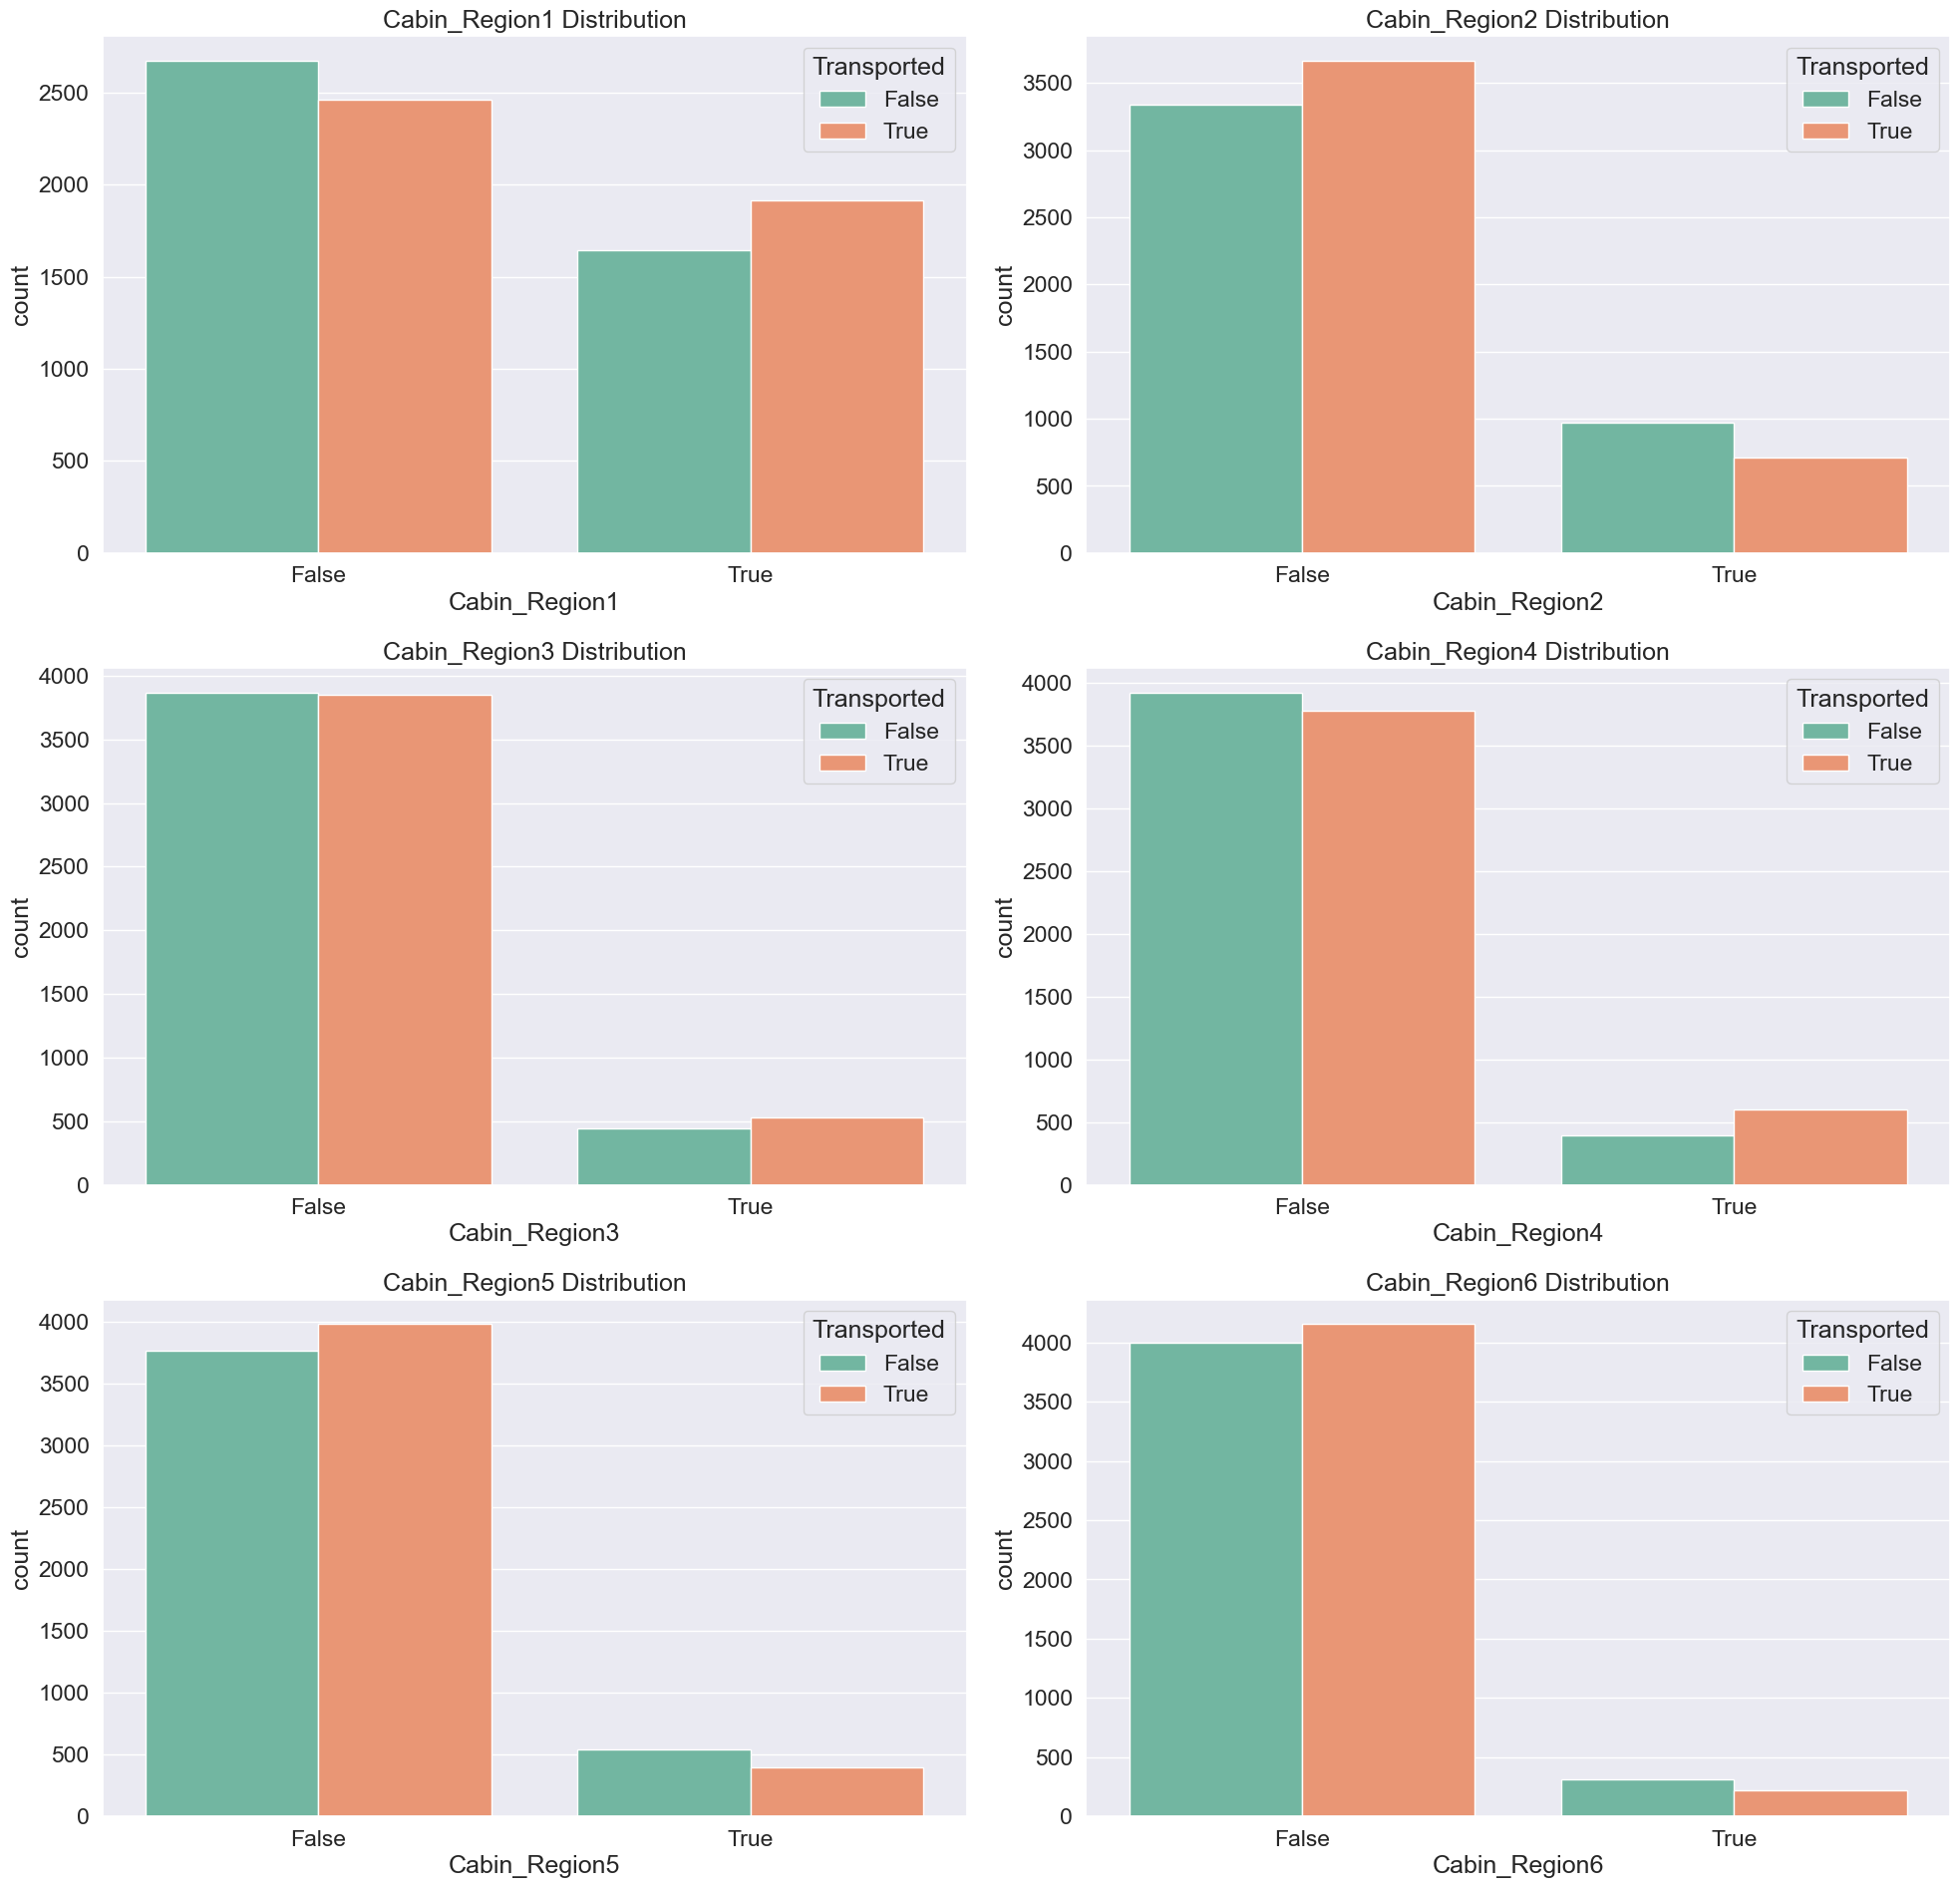

In [99]:
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()

## Creating a New feature from 'Age'

In [101]:
train_df['Age'].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [102]:
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_0-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33_50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)
        
    df["Age Group"] = age_group

In [103]:
age_group(train_df)
age_group(test_df)

In [105]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33_50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,age_50+
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_33_50
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_0-18


In [106]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1,G,S,True,False,False,False,False,False,Age_26-32
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1,F,S,True,False,False,False,False,False,Age_19-25
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1,C,S,True,False,False,False,False,False,Age_26-32
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1,C,S,True,False,False,False,False,False,Age_33_50
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1,F,S,True,False,False,False,False,False,Age_19-25


## Visualizing the Age group feature

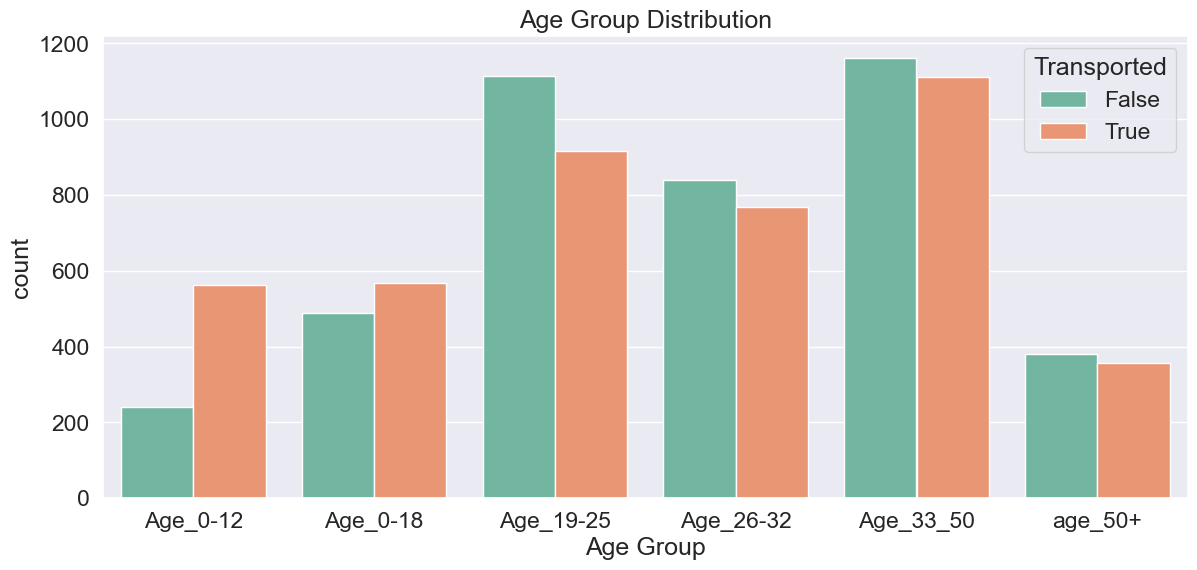

In [109]:
order = sorted(train_df["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported", data=train_df, palette="Set2",order=order)
plt.title("Age Group Distribution");

## Creating New Features using all Expenditure Features

In [111]:
train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [112]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)

In [113]:
new_exp_features(train_df)
new_exp_features(test_df)

In [116]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33_50,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,age_50+,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_33_50,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_0-18,1091.0,False


In [117]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1,G,S,True,False,False,False,False,False,Age_26-32,0.0,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1,F,S,True,False,False,False,False,False,Age_19-25,2832.0,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1,C,S,True,False,False,False,False,False,Age_26-32,0.0,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1,C,S,True,False,False,False,False,False,Age_33_50,7418.0,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1,F,S,True,False,False,False,False,False,Age_19-25,645.0,False


## Visualizing the Total Expenditure Feature

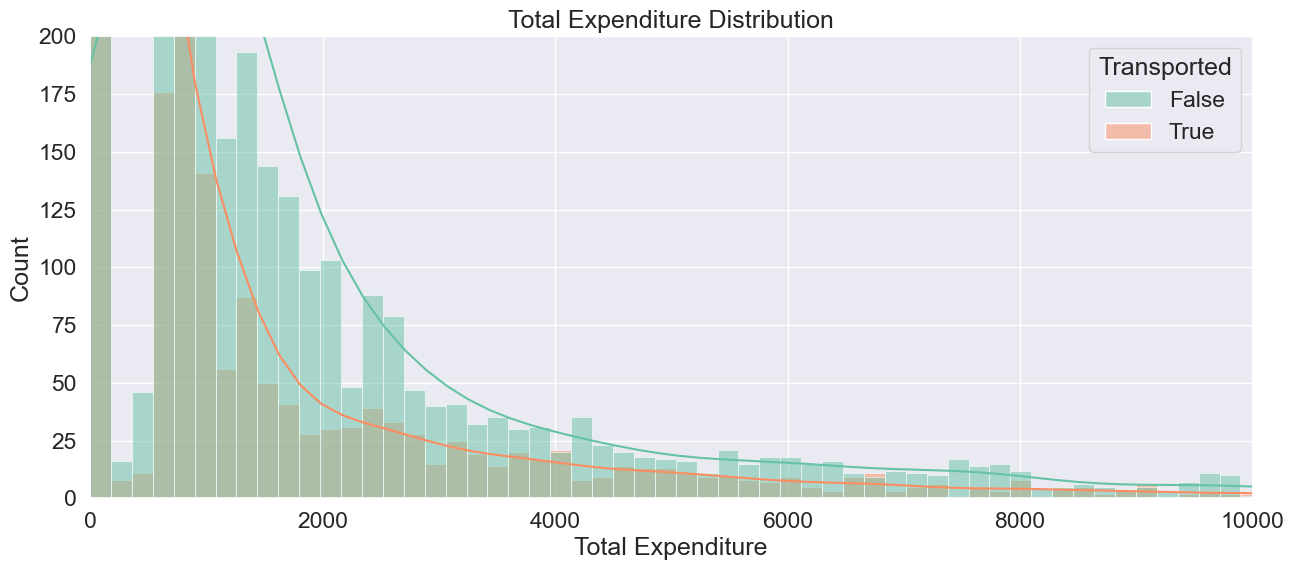

In [119]:
plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure", hue="Transported", data=train_df, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distribution");

In [120]:
def expenditure_category(df):
    expense_category = []
    
    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")
    
    df["Expenditure Category"] = expense_category

In [121]:
expenditure_category(train_df)
expenditure_category(test_df)

In [123]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33_50,0.0,True,No Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25,736.0,False,Medium Expense
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,age_50+,10383.0,False,High Expense
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_33_50,5176.0,False,High Expense
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_0-18,1091.0,False,Medium Expense


In [124]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1,G,S,True,False,False,False,False,False,Age_26-32,0.0,True,No Expense
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1,F,S,True,False,False,False,False,False,Age_19-25,2832.0,False,High Expense
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1,C,S,True,False,False,False,False,False,Age_26-32,0.0,True,No Expense
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1,C,S,True,False,False,False,False,False,Age_33_50,7418.0,False,High Expense
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1,F,S,True,False,False,False,False,False,Age_19-25,645.0,False,Low Expense


## visualizing Expenditure and No spending category

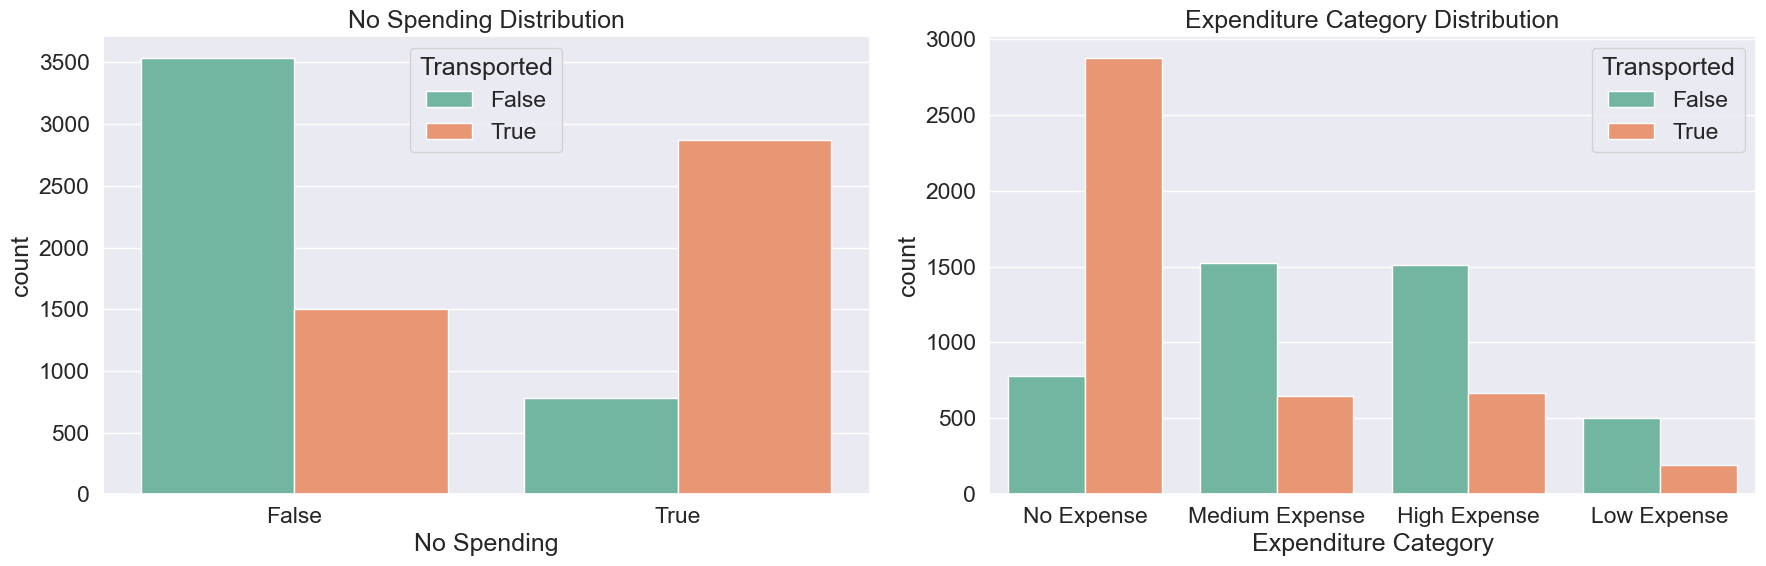

In [126]:
cols = ["No Spending", "Expenditure Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

## Data Pre-processing

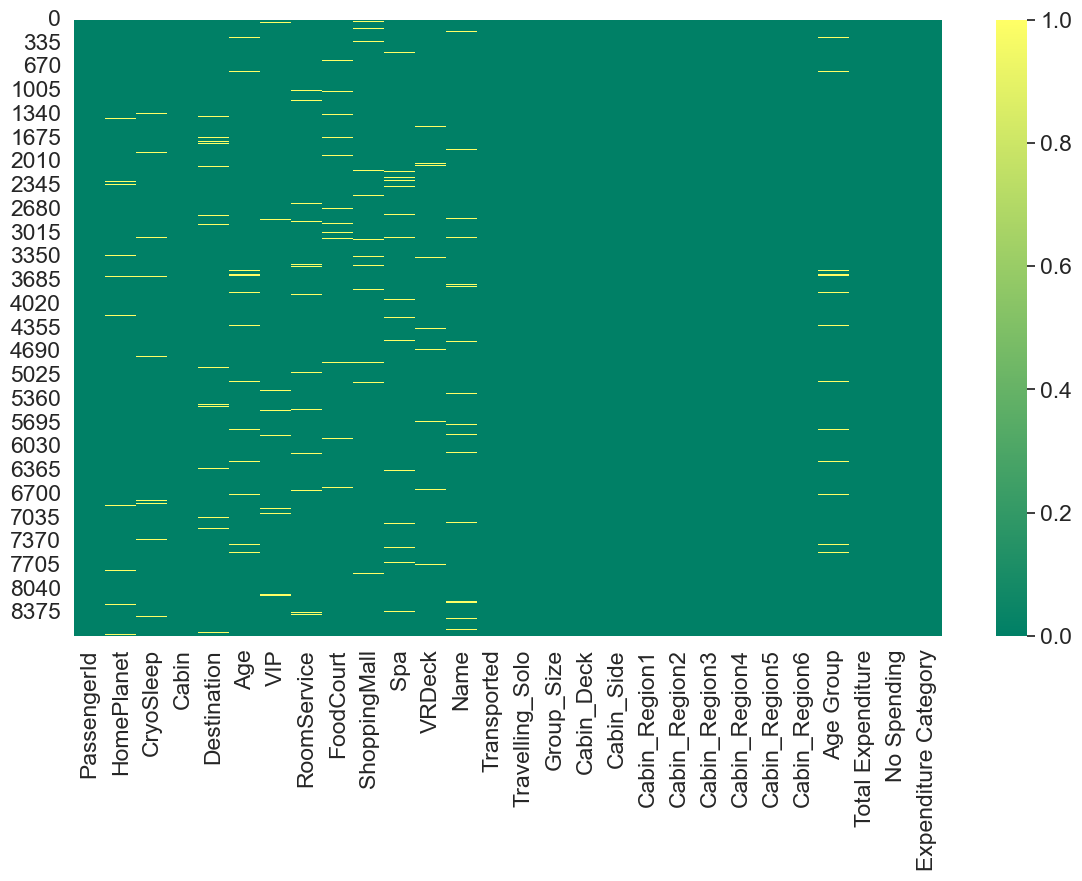

In [132]:
plt.figure(figsize=(14,8))
sns.heatmap(train_df.isnull(),cmap="summer")
plt.show()

## Handling missing values

In [135]:
imputer1 = SimpleImputer(strategy = 'most_frequent')
imputer2 = SimpleImputer(strategy = 'median')

In [136]:
cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

In [137]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [138]:
fill_missingno(train_df)
fill_missingno(test_df)

In [139]:
train_df.isnull().sum()

PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                   0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                    0
Transported             0
Travelling_Solo         0
Group_Size              0
Cabin_Deck              0
Cabin_Side              0
Cabin_Region1           0
Cabin_Region2           0
Cabin_Region3           0
Cabin_Region4           0
Cabin_Region5           0
Cabin_Region6           0
Age Group               0
Total Expenditure       0
No Spending             0
Expenditure Category    0
dtype: int64

In [140]:
test_df.isnull().sum()

PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                   0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                    0
Travelling_Solo         0
Group_Size              0
Cabin_Deck              0
Cabin_Side              0
Cabin_Region1           0
Cabin_Region2           0
Cabin_Region3           0
Cabin_Region4           0
Cabin_Region5           0
Cabin_Region6           0
Age Group               0
Total Expenditure       0
No Spending             0
Expenditure Category    0
dtype: int64

## Dropping Categorical Columns with high cardinality

In [142]:
cols = ['PassengerId', 'Cabin', 'Name']
train_df.drop(columns = cols, inplace = True)
test_df.drop(columns = cols, inplace = True)

In [145]:
test_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Travelling_Solo',
       'Group_Size', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1',
       'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5',
       'Cabin_Region6', 'Age Group', 'Total Expenditure', 'No Spending',
       'Expenditure Category'],
      dtype='object')

## Applying Log transformation on expenditure features

In [147]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total Expenditure']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

## Visualizing these features after log transformation

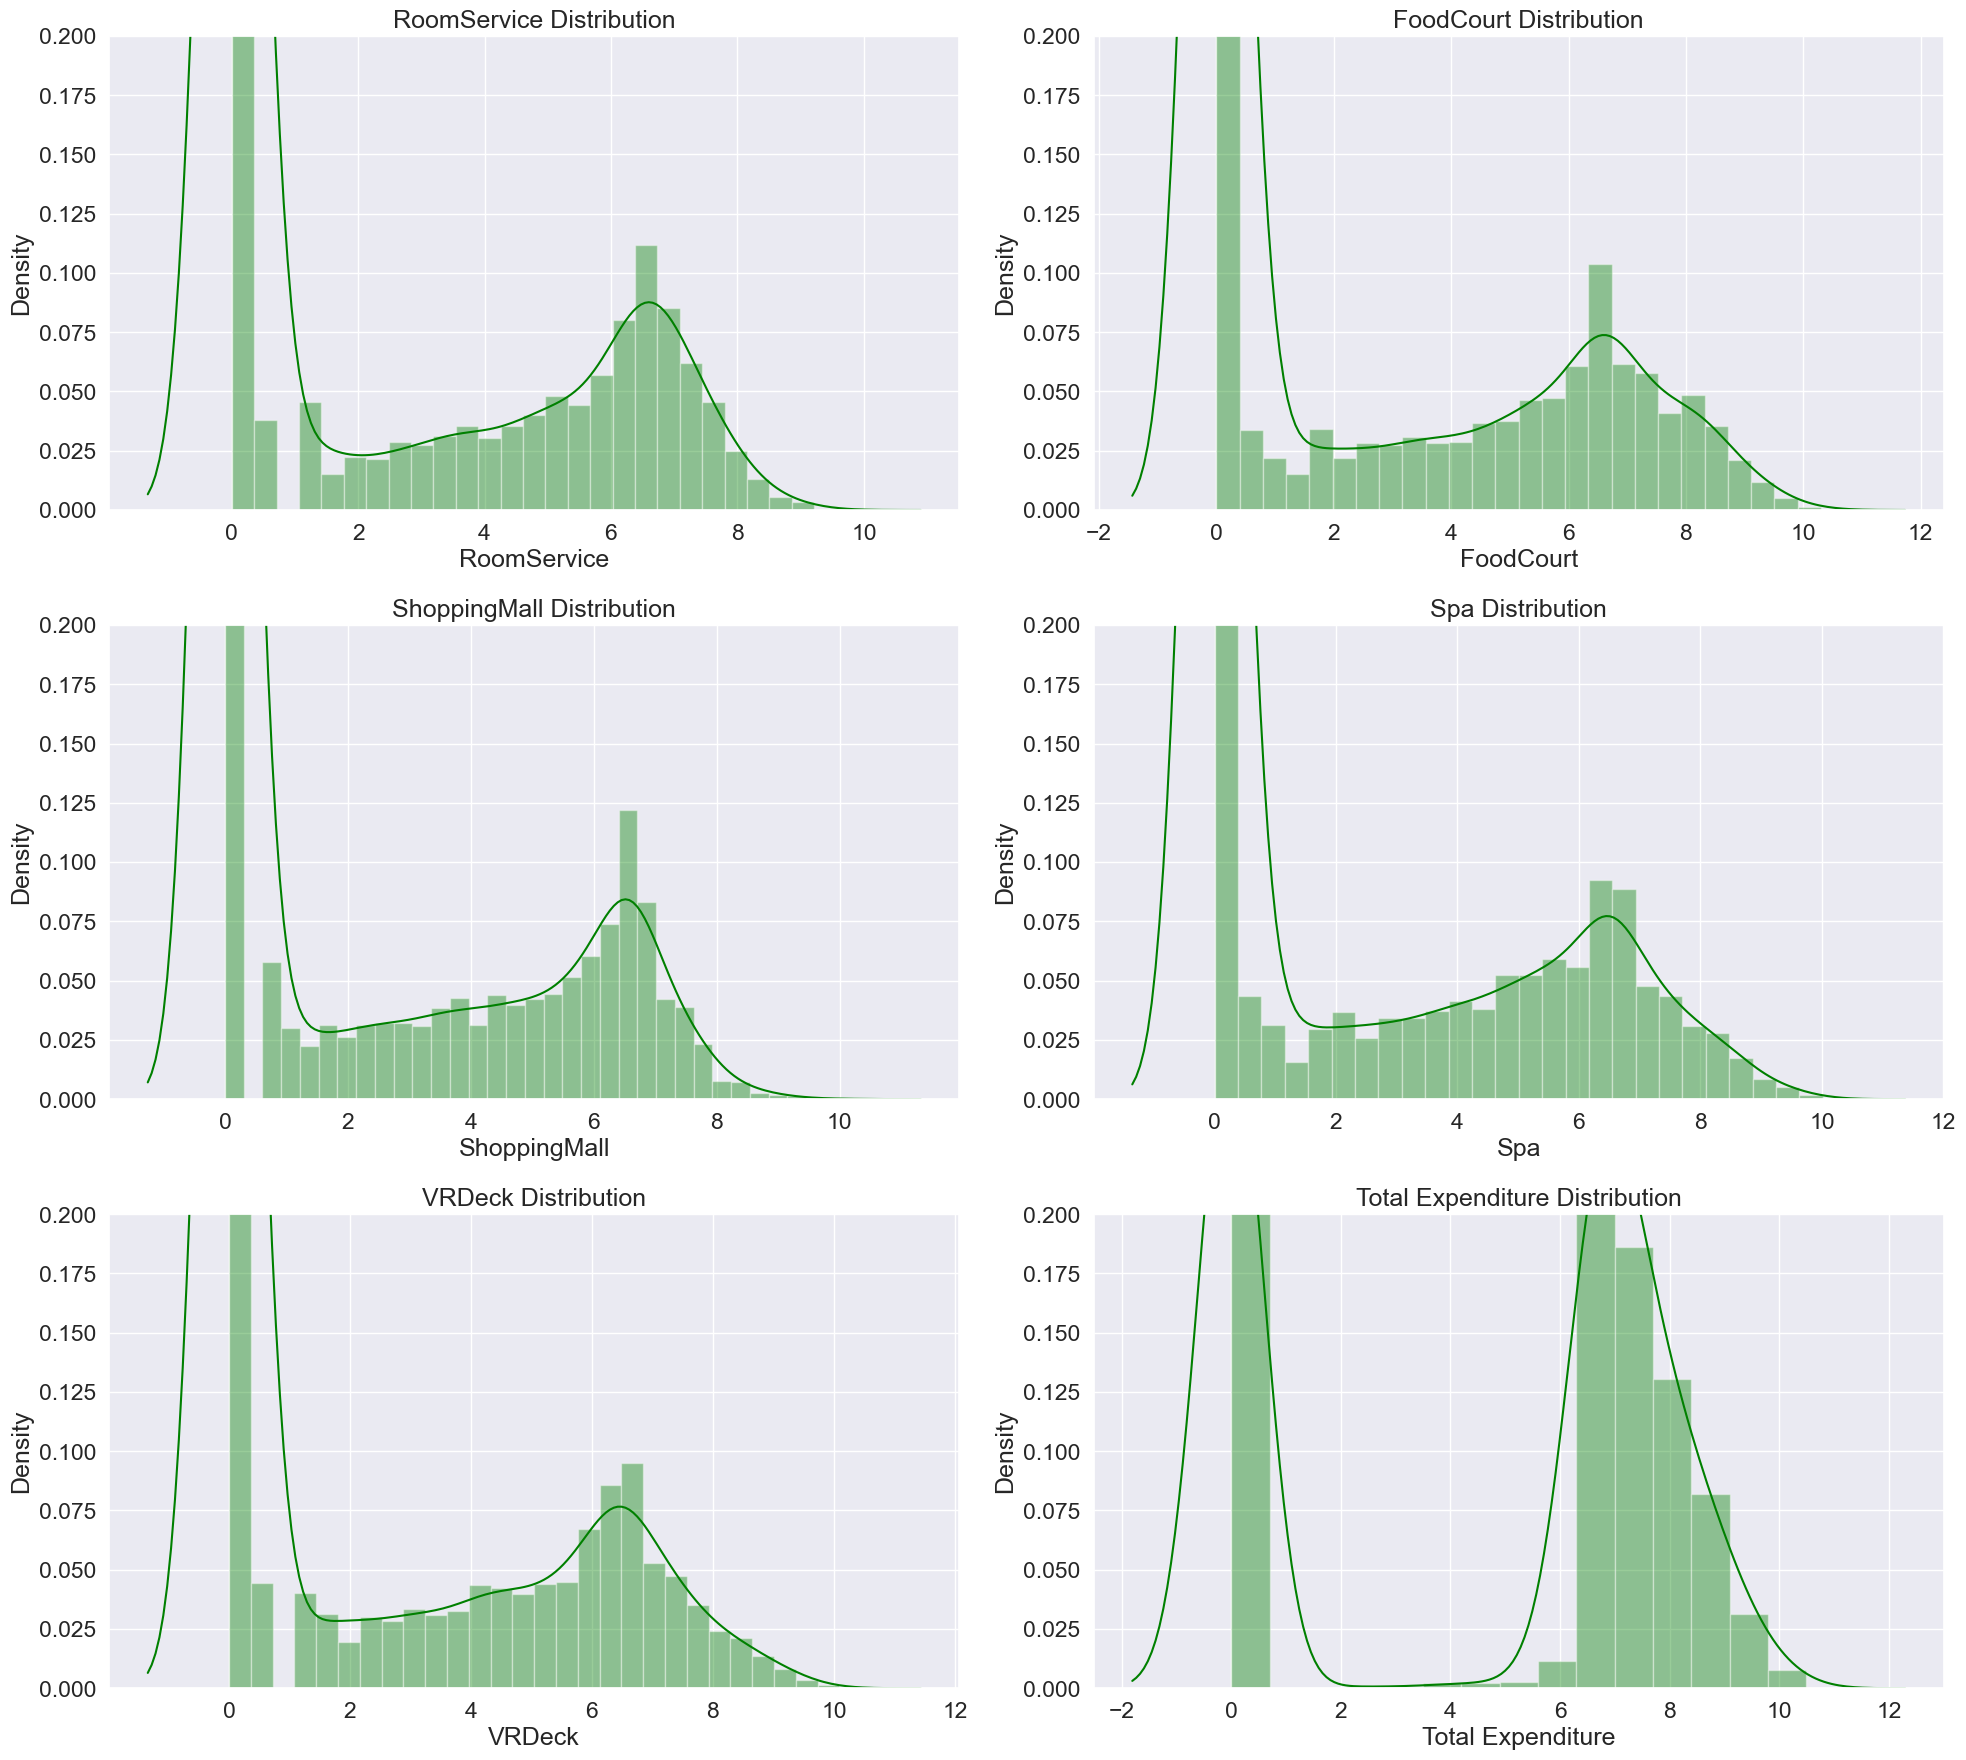

In [148]:
x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

## Checking Data types

In [151]:
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Age Group                object
Total Expenditure       float64
No Spending              object
Expenditure Category     object
dtype: object

In [152]:
cols = ["CryoSleep","VIP","Travelling_Solo","No Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4",
       "Cabin_Region5","Cabin_Region6"]

In [153]:
train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

In [154]:
train_df.dtypes

HomePlanet               object
CryoSleep                  bool
Destination              object
Age                     float64
VIP                        bool
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo            bool
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1              bool
Cabin_Region2              bool
Cabin_Region3              bool
Cabin_Region4              bool
Cabin_Region5              bool
Cabin_Region6              bool
Age Group                object
Total Expenditure       float64
No Spending                bool
Expenditure Category     object
dtype: object

## Feature Encoding

In [155]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age Group","No Spending",
                    "Expenditure Category"]

## Label Encoding

In [157]:
enc = LabelEncoder()

In [160]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)

In [161]:
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

## One hot encoding

In [164]:
train_df = pd.get_dummies(train_df, columns = nominal_cat_cols)

In [165]:
test_df = pd.get_dummies(test_df, columns = nominal_cat_cols)

In [166]:
train_df.head(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,0,1,0,0,0,1
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,True,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,1,0,0,0,0,1
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,False,0,2.0,0,1,1,0,0,0,0,0,5,9.248021,0,0,0,1,0,0,0,1
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,False,0,2.0,0,1,1,0,0,0,0,0,4,8.551981,0,0,0,1,0,0,0,1
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,True,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,1,0,0,0,0,1


In [168]:
train_df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Travelling_Solo', 'Group_Size',
       'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2',
       'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6',
       'Age Group', 'Total Expenditure', 'No Spending', 'Expenditure Category',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')

In [170]:
train_df['Transported'].replace({False: 0, True: 1}, inplace = True)

## Selecting Features and Target variable for Model building

In [173]:
X = train_df.drop(columns = ['Transported'])
y = train_df['Transported']

## Feature Scaling

In [175]:
scaler = StandardScaler()

In [176]:
X_scaled = scaler.fit_transform(X)


In [177]:
test_df_scaled = scaler.fit_transform(test_df)

## Splitting into train and test(Model that don't require scaled data)

In [186]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

## Splitting into train and test(Model that require scaled data)

In [187]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0) 

## Model Building

In [181]:
training_score = []
testing_score = []

In [185]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

## 1. Logistic Regression

Accuracy_Score of LogisticRegression() model on Training Data is: 77.8688524590164
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.17078780908568

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7578040904198062
Recall Score of LogisticRegression() model is: 0.8036529680365296
F1 Score of LogisticRegression() model is: 0.7800554016620498

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


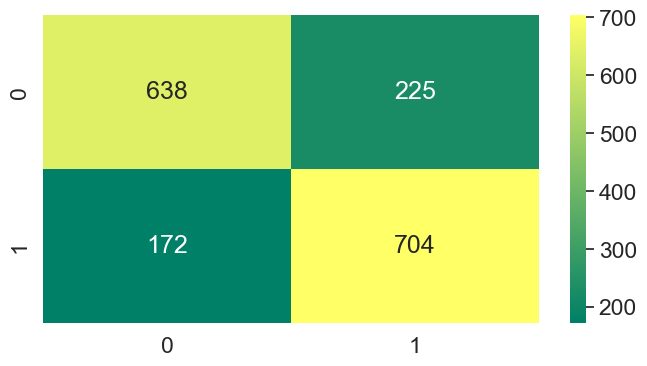

In [188]:
model_prediction(LogisticRegression())

## 2. KNeighbors Classifier Model

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 83.13201035375324
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 75.50316273720529

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7697841726618705
Recall Score of KNeighborsClassifier() model is: 0.7328767123287672
F1 Score of KNeighborsClassifier() model is: 0.7508771929824561

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


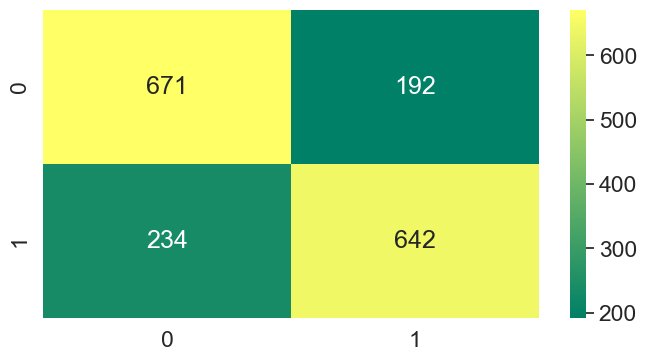

In [190]:
model_prediction(KNeighborsClassifier())

## 3. Supoort Vector Machines

Accuracy_Score of SVC() model on Training Data is: 81.8234109864826
Accuracy_Score of SVC() model on Testing Data is: 79.700977573318

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.7995418098510882
Recall Score of SVC() model is: 0.7968036529680366
F1 Score of SVC() model is: 0.7981703830760436

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


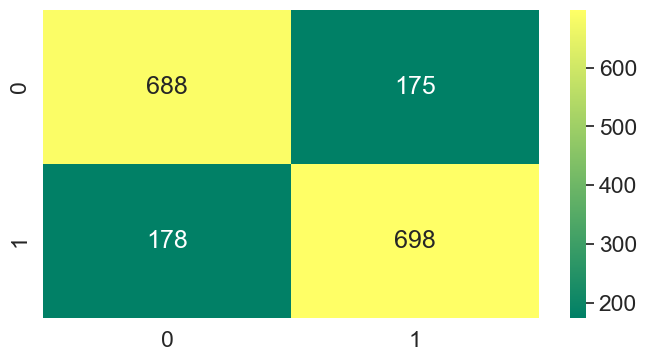

In [192]:
model_prediction(SVC())

## 4.Naive-Bayes Model

Accuracy_Score of GaussianNB() model on Training Data is: 73.94305435720449
Accuracy_Score of GaussianNB() model on Testing Data is: 73.3755031627372

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.7779273216689099
Recall Score of GaussianNB() model is: 0.6598173515981736
F1 Score of GaussianNB() model is: 0.7140210006176654

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


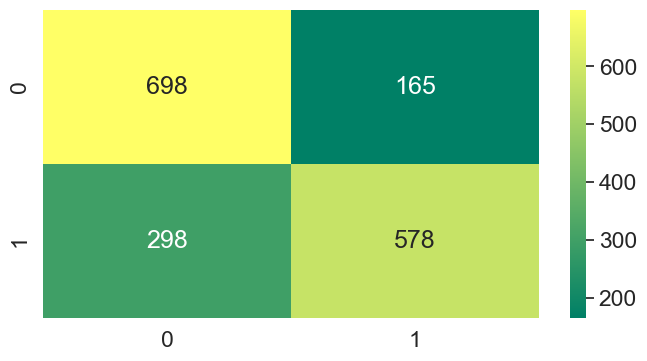

In [194]:
model_prediction(GaussianNB())

## Models that require unscaled data

In [195]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

## 5. Decision Tree Classifier model

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 98.53321829163072
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 73.60552041403106

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.734006734006734
Recall Score of DecisionTreeClassifier() model is: 0.7465753424657534
F1 Score of DecisionTreeClassifier() model is: 0.7402376910016978

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


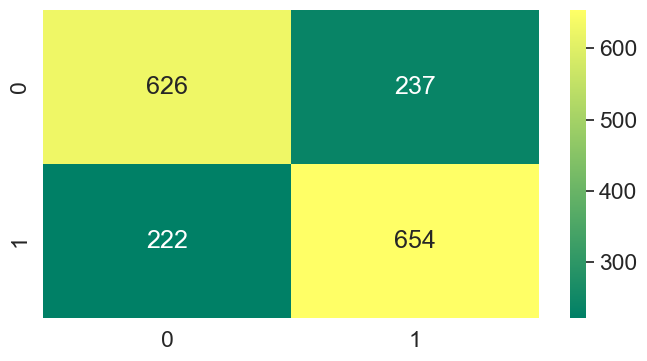

In [197]:
model_prediction(DecisionTreeClassifier())

## 6. Random Forest Classifier Model

Accuracy_Score of RandomForestClassifier() model on Training Data is: 98.51883807880355
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 79.98849913743531

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8211678832116789
Recall Score of RandomForestClassifier() model is: 0.7705479452054794
F1 Score of RandomForestClassifier() model is: 0.795053003533569

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


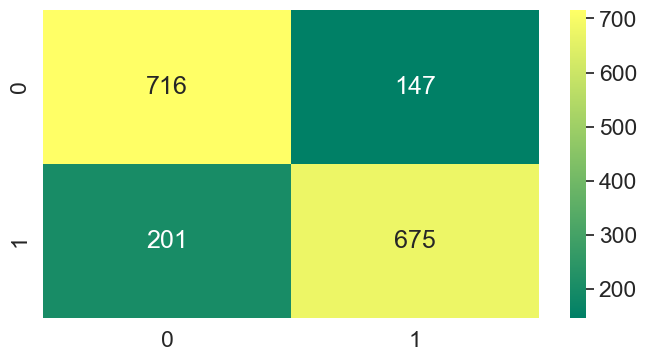

In [199]:
model_prediction(RandomForestClassifier())

## 7. AdaBoost Classifier Model

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 79.98274374460742
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 79.24094307073031

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.7657378740970072
Recall Score of AdaBoostClassifier() model is: 0.8470319634703196
F1 Score of AdaBoostClassifier() model is: 0.8043360433604336

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


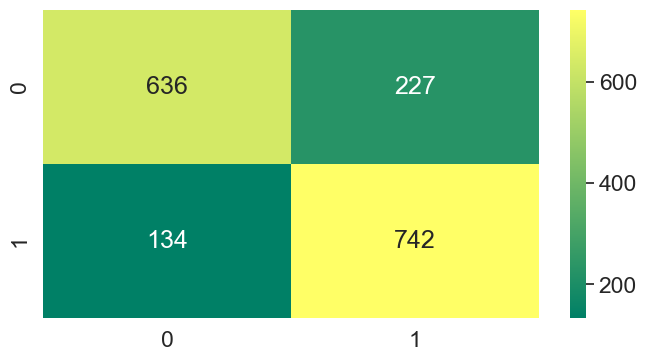

In [201]:
model_prediction(AdaBoostClassifier())

## 8. Gradient Boosting Classifier

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 82.053494391717
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 79.29844738355378

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7721518987341772
Recall Score of GradientBoostingClassifier() model is: 0.8356164383561644
F1 Score of GradientBoostingClassifier() model is: 0.8026315789473685

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


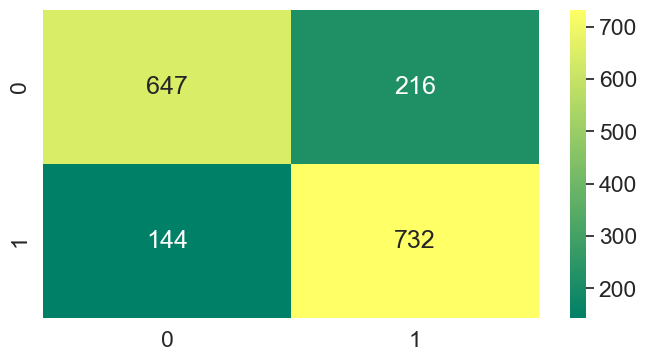

In [203]:
model_prediction(GradientBoostingClassifier())

## 9. LGBM Classifier model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Accuracy_Score of LGBMClassifier() model on Training Data is: 88.35202761000863
Accuracy_Score of LGBMClassifier() model on Testing Data is: 81.48361127084532

------------------------------------------------------------------------
Precision Score of LGBMClassifier() model is: 0.8064159292035398
Recall Score of LGBMClassifier() model is: 0.8321917808219178
F1 Scor

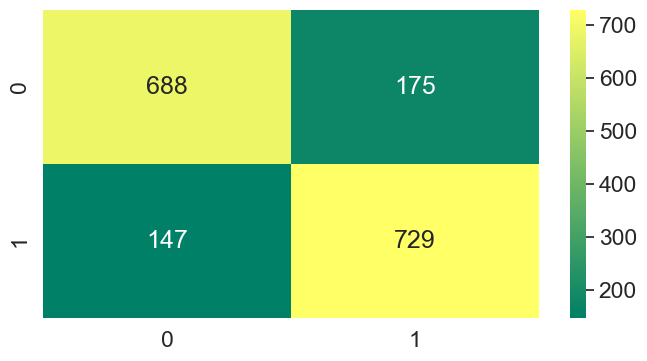

In [205]:
model_prediction(LGBMClassifier())

## 10. XGBCLassifier Model

Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) model on Training Data is: 92.78113316077078
Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
             

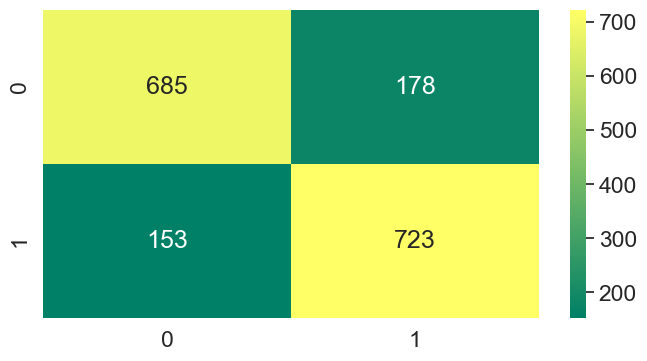

In [207]:
model_prediction(XGBClassifier())

## 11. Cat Boost Classifier Model

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x0000019B803E0B70> model on Training Data is: 87.331032499281
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x0000019B803E0B70> model on Testing Data is: 81.36860264519838

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x0000019B803E0B70> model is: 0.8032967032967033
Recall Score of <catboost.core.CatBoostClassifier object at 0x0000019B803E0B70> model is: 0.8344748858447488
F1 Score of <catboost.core.CatBoostClassifier object at 0x0000019B803E0B70> model is: 0.8185890257558791

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x0000019B803E0B70> model is:


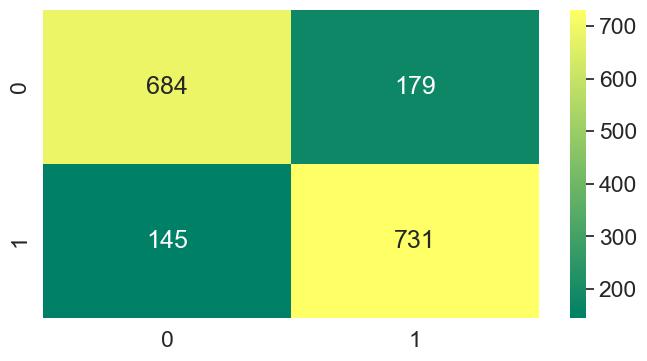

In [209]:
model_prediction(CatBoostClassifier(verbose = False))

## All model Performance Comparison

In [211]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [212]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [213]:
df

,Algorithms,Training Score,Testing Score
0,Logistic Regression,77.868852,77.170788
1,KNN,83.132010,75.503163
2,SVM,81.823411,79.700978
3,Naive Bayes,73.943054,73.375503
4,Decision Tree,98.533218,73.605520
5,Random Forest,98.518838,79.988499
6,Ada Boost,79.982744,79.240943
7,Gradient Boost,82.053494,79.298447
8,LGBM,88.352028,81.483611
9,XGBoost,92.781133,80.966072


## Plotting the results

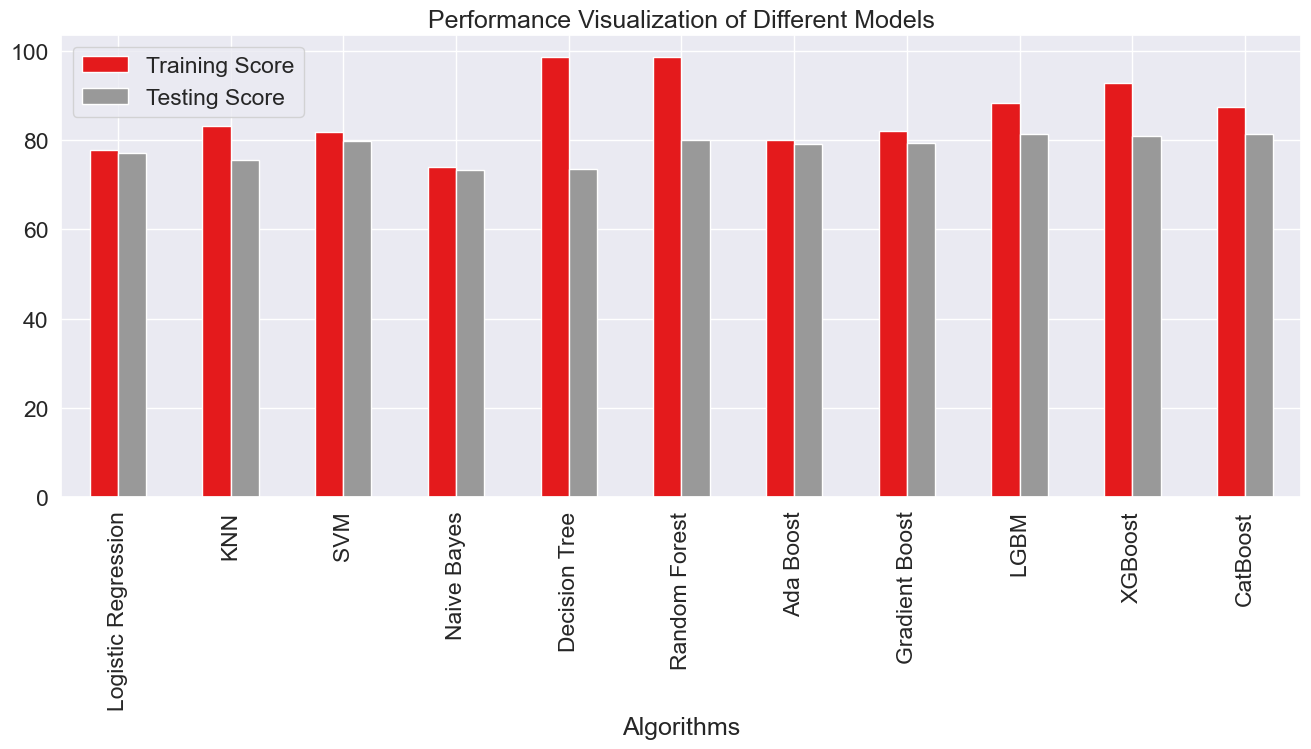

In [215]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## 12. Stacking Classifier Model

In [218]:
stacking_model  = StackingClassifier(estimators = [('LGBM', LGBMClassifier()),
                                                  ('Cat Boost', CatBoostClassifier(verbose = False)),
                                                  ('XGBOOST', XGBClassifier()),
                                                  ('RFC', RandomForestClassifier())])

In [219]:
stacking_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2802, number of negative: 2761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

StackingClassifier(estimators=[('LGBM', LGBMClassifier()),
                               ('Cat Boost',
                                <catboost.core.CatBoostClassifier object at 0x0000019B81E618D0>),
                               ('XGBOOST',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu...
                                              interaction_constraints=None,
                                              learning_ra

In [220]:
x_train_pred5 = stacking_model.predict(x_train)

In [221]:
x_test_pred5 = stacking_model.predict(x_test)

In [222]:
accuracy_score(y_train, x_train_pred5)

0.8748921484037964

In [223]:
accuracy_score(y_test, x_test_pred5)

0.8142610695802185

## Predicting the test data

In [224]:
pred = stacking_model.predict(test_df)

In [225]:
pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

## Submission

In [229]:
test_df.head(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,6,1,1,0,0,0,0,0,3,0.000000,1,3,1,0,0,0,0,1
1,0,19.0,0,0.000000,2.302585,0.000000,7.945910,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,7.949091,0,0,1,0,0,0,0,1
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,2,1,1,0,0,0,0,0,3,0.000000,1,3,0,1,0,1,0,0
3,0,38.0,0,0.000000,8.802823,0.000000,5.204007,6.37332,1,1.0,2,1,1,0,0,0,0,0,4,8.911800,0,0,0,1,0,0,0,1
4,0,20.0,0,2.397895,0.000000,6.455199,0.000000,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,6.470800,0,1,1,0,0,0,0,1


In [233]:
pass_df = pass_df['PassengerId']

In [236]:
pass_df = pd.DataFrame(pass_df)

In [237]:
pass_df['Transported'] = pred

In [238]:
pass_df.head(5)

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [239]:
pass_df['Transported'].replace({1: True, 0: False}, inplace = True)

In [240]:
pass_df.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


## Submission_file

In [242]:
pass_df.to_csv('Spaceship_titanic_prediction.csv', index = False)